In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pyemma
import pyemma.msm as msm
import pyemma.plots as mplt

In [2]:
B = np.arange(2480, 2490)
A = np.arange(2490, 2500)
process = 'I-A_to_A-I'
M2 = pyemma.load('MSM/pyemma/msm_enspara_tprobs.pyemma')
tpt = msm.tpt(M2, A, B)

In [3]:
paths = np.load(f'TPT_0/pathways_{process}.npy', allow_pickle=True)
pathfluxes = np.load(f'TPT_0/pathfluxes_{process}.npy')

In [5]:
pt_cl = np.load('pathways_clusters.npy', allow_pickle=True)
fin_cl = []
for cl in pt_cl:
    fin_cl.append(np.array(cl))
fin_cl = np.array(fin_cl)

/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [6]:
full_sets = np.load('full_sets.npy', allow_pickle= True)
full_clusters = [full_sets[49], np.concatenate(full_sets[[1, 2, 3, 42]]), full_sets[47],
                         np.concatenate(full_sets[[4, 6, 7, 10, 22, 26, 31]]), full_sets[0]]
(tpt_sets, tpt2_coarse) = tpt.coarse_grain(full_clusters)

In [9]:
print (tpt2_coarse.A)
print (tpt2_coarse.B)
print ("pi coarse: ")
print (tpt2_coarse.stationary_distribution)
print ("sum = ",np.sum(tpt2_coarse.stationary_distribution))
print ("committors : ")
print (tpt2_coarse.committor)
print (tpt2_coarse.backward_committor)
print ("F coarse : ")
print (tpt2_coarse.gross_flux)
print ("F net coarse : ")
print (tpt2_coarse.net_flux)

[0]
[5]
pi coarse: 
[1.68665281e-04 2.91705504e-02 3.84686406e-01 6.46987166e-02
 5.30131326e-01 2.77903430e-04]
sum =  1.0091335679029427
committors : 
[0.         0.6568872  0.65262095 0.64778754 0.64693228 1.        ]
[1.         0.3431128  0.34737905 0.35221246 0.35306772 0.        ]
F coarse : 
[[0.00000000e+00 1.04780696e-07 2.43458186e-06 1.42678301e-05
  3.31396162e-06 3.49129902e-09]
 [0.00000000e+00 0.00000000e+00 1.37231934e-03 1.03451869e-04
  4.54656889e-04 1.24836397e-05]
 [0.00000000e+00 1.38283055e-03 0.00000000e+00 1.62991260e-03
  6.26180742e-03 3.64072522e-06]
 [0.00000000e+00 1.04870702e-04 1.64068631e-03 0.00000000e+00
  7.54550029e-04 2.19183906e-07]
 [0.00000000e+00 4.55491206e-04 6.26145875e-03 7.52349460e-04
  0.00000000e+00 5.33238755e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
F net coarse : 
[[0.00000000e+00 1.04780696e-07 2.43458186e-06 1.42678301e-05
  3.31396162e-06 3.49129902e-09]
 [0.00000000e+00 

In [10]:
(cgpaths,cgpathfluxes) = tpt2_coarse.pathways(fraction = 0.90)
cumflux = 0
print ("Path flux\t\t%path\t%of total\tpath")
for i in range(len(cgpaths)):
    cumflux += cgpathfluxes[i]
    print (cgpathfluxes[i],'\t','%3.3f'%(100.0*cgpathfluxes[i]/tpt2_coarse.total_flux),'%\t','%3.3f'%(100.0*cumflux/tpt2_coarse.total_flux),'%\t\t',cgpaths[i])

Path flux		%path	%of total	path
1.051121640668548e-05 	 52.231 %	 52.231 %		 [0 3 2 1 5]
3.31396162414202e-06 	 16.467 %	 68.698 %		 [0 4 5]
2.4345818619203027e-06 	 12.098 %	 80.795 %		 [0 2 5]
2.0184259303529754e-06 	 10.030 %	 90.825 %		 [0 3 4 5]


In [11]:
Fsub = tpt2_coarse.major_flux(fraction=0.90)
print (Fsub)
Fsubpercent = 100.0 * Fsub / tpt2_coarse.total_flux

[[0.00000000e+00 0.00000000e+00 2.43458186e-06 1.25296423e-05
  3.31396162e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.05112164e-05]
 [0.00000000e+00 1.05112164e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.43458186e-06]
 [0.00000000e+00 0.00000000e+00 1.05112164e-05 0.00000000e+00
  2.01842593e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.33238755e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


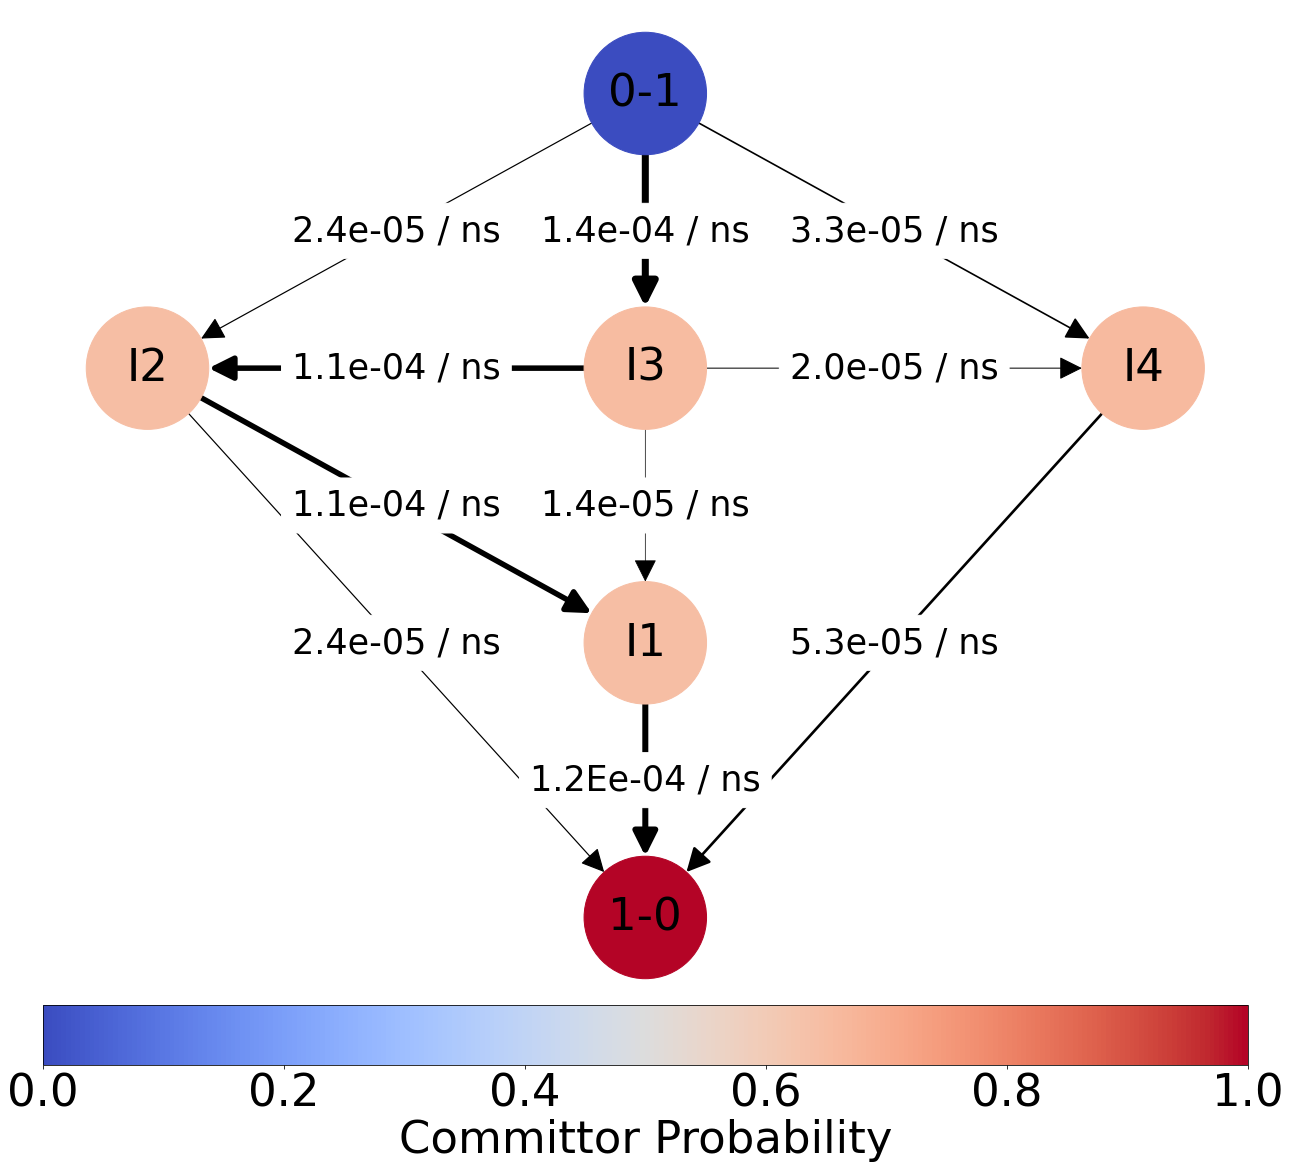

In [14]:
a = positions
new_pos = {'0-1': a[0], 'I1': a[1], 'I2': a[2], 
              'I3': a[3], 'I4': a[4], '1-0': a[5]}
new_edge_labels = {('I1', '1-0'): '1.2Ee-04 / ns', 
                   ('I2', '1-0'): '2.4e-05 / ns',
                   ('I4', '1-0'): '5.3e-05 / ns',
                   ('I2', 'I1'): '1.1e-04 / ns',
                   ('I3', 'I1'): '1.4e-05 / ns',
                   ('I3', 'I2'): '1.1e-04 / ns',
                   ('0-1', 'I2'): '2.4e-05 / ns',
                   ('I3', 'I4'): '2.0e-05 / ns',
                   ('0-1', 'I4'): '3.3e-05 / ns',
                   ('0-1', 'I3'): '1.4e-04 / ns'}

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('I1', '1-0')], weight=1.2E-4)
G.add_edges_from([('I2', '1-0')], weight=2.4E-5)
G.add_edges_from([('I4', '1-0')], weight=5.3E-5)
G.add_edges_from([('I3', 'I1')], weight=1.4E-5)
G.add_edges_from([('I2', 'I1'), ('I3', 'I2')], weight=1.1E-4)
G.add_edges_from([('I3', 'I4')], weight=2.0E-5)
G.add_edges_from([('0-1', 'I3')], weight=1.4E-4)
G.add_edges_from([('0-1', 'I2')], weight=2.4E-5)
G.add_edges_from([('0-1', 'I4')], weight=3.3E-5)


val_map = {'1-0': 1.0, 'I1': 0.64693228, 'I2': 0.64778754, 'I3': 0.65262095, 
           'I4': 0.6568872, '0-1': 0.0}

values = [val_map.get(node, 1.4) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)

red_edges = [('1-0', 'I1'), ('I1','I2'), ('I2','I3'), ('I3','0-1')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
size = [d['weight'] for _,_,d in G.edges(data=True)]
color = np.array([0., 0.3431128, 0.34737905, 0.35221246, 0.35306772, 1.])
cmap = plt.cm.coolwarm

cm = 1/2.54
ft = 45
plt.figure(figsize=(8.5/cm, 8.5/cm))
# nx.draw_networkx_edges(G, new_pos, connectionstyle= 'angle3')
nx.draw_networkx_edge_labels(G, new_pos, edge_labels=new_edge_labels, font_size = 35, rotate = False)
nx.draw(G, new_pos, node_color = values, node_size=15000, 
        cmap=cmap, with_labels = True, arrowsize = 50, width = np.array(size)*(10**4.7), font_size=ft)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", pad = 0.0005)
cbar.set_label('Committor Probability', size = ft)
cbar.ax.tick_params(labelsize=ft)
plt.savefig('images/pathways_coarse_grained_w_committor_0-1_to_1-0.png', 
                              bbox_inches ="tight", pad_inches = 0.05, transparent = True, facecolor ="w",
                              edgecolor ='w', orientation ='landscape')
plt.show()